# Data Augment
    Perform different data augmentation techniques on an input image.

    Parameters:
    - image: Input RGB image (numpy array).
    - option: Augmentation type ('translate', 'rotate', 'cutout', 'fliplr', 'noise', 'downSample', 'quantize', 'colorChanging').
    - args: Additional parameters for augmentation functions.

    Returns:
    - Augmented image (numpy array).
    

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
image_Path = r'D:\py\Digital_Image_Processing\Image\XLA.jpg'

### Create a data augment function

In [28]:
def data_augment (image, option, *arg):
    if option == 'translate':
        return translate(image)
    elif option == 'rotate':
        return rotate(image)
    elif option == 'cutout':
        return cutOut(image)
    elif option == 'fliplr':
        return fliplr(image)
    elif option == 'noise':
        return noise(image, arg[0])
    elif option == 'downsample':
        return downSample(image, arg[0])
    elif option == 'quantize':
        return quantize(image, arg[0])
    elif option == 'colorchanging':
        return colorChanging(image)
    else:
        raise ValueError("Invalid option selected!")

### Translation (Shift image randomly)

In [29]:
def translate(image):
    rows, cols, _ = image.shape # thu tu mang anh trong la: y, x, z
    x_shift = random.randint(-(cols//2), cols//2)
    y_shift = random.randint(-(rows//2), rows//2)
    # 1, 0: No scaling or shearing in the x-direction.
    # 0, 1: No scaling or shearing in the y-direction.
    translation_mattrix = np.float32([[1, 0, x_shift],[0, 1, y_shift]])
    translated_image = cv2.warpAffine(image, translation_mattrix, (cols, rows))
    return translated_image

### Rotation

In [30]:
def rotate(image):
    rows, cols, _ = image.shape # thu tu mang anh trong la: y, x, z
    angle = random.randint(-180, 180)
    rotation_mattrix = cv2.getRotationMatrix2D((cols//2,rows//2), angle, 1)
    rotated_imaged = cv2.warpAffine(image, rotation_mattrix, (cols, rows))
    return rotated_imaged

### Cutout (Random hole in center)

In [31]:
def cutOut(image):
    rows, cols, _ = image.shape # thu tu mang anh trong la: y, x, z
    x = random.randint(cols//4, 3*cols//4)
    y = random.randint(rows//4, 3*rows//4)
    h = random.randint(rows//8, rows//4)
    w = random.randint(cols//8, cols//4)
    cutout_image = image.copy()
    cutout_image[y-h//2:y+h//2, x-w//2:x+w//2] = 0 # thu tu mang anh trong la: y, x, z
    return cutout_image

### Flip Image Horizontally

In [32]:
def fliplr(image):
    return cv2.flip(image, 1)

### Add Gaussian Noise

In [33]:
def noise(image, sigma):
    noise_image = np.clip(image.astype(np.float32) + sigma*np.random.randn(*image.shape), 0, 255) # np.clip gioi han kich thuoc anh
    return noise_image.astype(np.uint8)

### Downsample Image (Reduce Resolution)

In [34]:
def downSample(image, k):
    downSample_image = image[::k, ::k]
    return downSample_image

### Quantization (Reduce to k bits)

In [35]:
def quantize(image, k):
    levels = 2**k
    quantized_image = (image // (256//levels)) * (256//levels)
    return quantized_image

### Color Channel Swap (Swap Red & Green)

In [36]:
def colorChanging(image):
    swap_image = image.copy()
    swap_image[:, :, [0, 1]] = swap_image[:, :, [1, 0]]
    return swap_image

### Testing with an Example Image

In [37]:
if __name__ == "__main__":
    image = cv2.imread(image_Path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    print('What do you want ')
    option = input()

    if option == 'noise':
        sigma = float(input("Enter noise sigma value (ex: 25, ...): "))
        aug_image = data_augment(image, option, sigma)
    elif option == 'downsample':
        k = int(input("Enter down sample value (ex: 2, ...): "))
        aug_image = data_augment(image, option, k)
    elif option == 'quantize':
        k = int(input("Enter bit value(ex: 4, ...): "))
        aug_image = data_augment(image, option, k)
    else:
        aug_image = data_augment(image, option)

What do you want 


### Display Original and Augmented Images

(np.float64(-0.5), np.float64(599.5), np.float64(348.5), np.float64(-0.5))

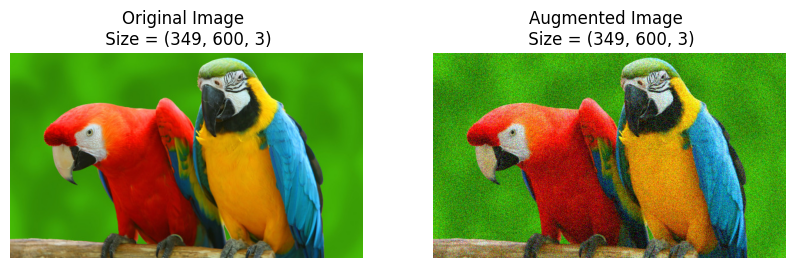

In [38]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f'Original Image \n Size = {image.shape}')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(aug_image)
plt.title(f'Augmented Image \n Size = {aug_image.shape}')
plt.axis("off")
